<a href="https://colab.research.google.com/github/sethu-7/Bert/blob/main/Bert_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/honors/amazon_reviews_us_Books_v1_02.tsv/amazon_reviews_us_Books_v1_02.tsv",sep='\t',on_bad_lines='skip')
data.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12076615,RQ58W7SMO911M,0385730586,122662979,Sisterhood of the Traveling Pants (Book 1),Books,4.0,2.0,3.0,N,N,this book was a great learning novel!,this boook was a great one that you could lear...,2005-10-14
1,US,12703090,RF6IUKMGL8SF,0811828964,56191234,The Bad Girl's Guide to Getting What You Want,Books,3.0,5.0,5.0,N,N,Fun Fluff,If you are looking for something to stimulate ...,2005-10-14
2,US,12257412,R1DOSHH6AI622S,1844161560,253182049,"Eisenhorn (A Warhammer 40,000 Omnibus)",Books,4.0,1.0,22.0,N,N,this isn't a review,never read it-a young relative idicated he lik...,2005-10-14
3,US,50732546,RATOTLA3OF70O,0373836635,348672532,Colby Conspiracy (Colby Agency),Books,5.0,2.0,2.0,N,N,fine author on her A-game,Though she is honored to be Chicago Woman of t...,2005-10-14
4,US,51964897,R1TNWRKIVHVYOV,0262181533,598678717,The Psychology of Proof: Deductive Reasoning i...,Books,4.0,0.0,2.0,N,N,Execellent cursor examination,Review based on a cursory examination by Unive...,2005-10-14


In [ ]:
data.describe

<bound method NDFrame.describe of         marketplace  customer_id       review_id  product_id  product_parent  \
0                US     12076615   RQ58W7SMO911M  0385730586       122662979   
1                US     12703090    RF6IUKMGL8SF  0811828964        56191234   
2                US     12257412  R1DOSHH6AI622S  1844161560       253182049   
3                US     50732546   RATOTLA3OF70O  0373836635       348672532   
4                US     51964897  R1TNWRKIVHVYOV  0262181533       598678717   
...             ...          ...             ...         ...             ...   
3105365          US     53096582  R1U2RAML67OKWM  0471114251       574261099   
3105366          US     53011769  R33HOJ2OWJIDQI  089145537X       836948045   
3105367          US     53096573   RPLV77JZXG575  047194128X       377091465   
3105368          US     53096571   RHL4UW17ZK72A  0521314925       980601331   
3105369          US     53096571  R34N4QWDXX58WB  0870210092       442607382   

     

In [ ]:
len(data.keys())

15

In [ ]:
data.groupby("star_rating").describe()

customer_id                                                      \
                  count          mean           std         min         25%   
star_rating                                                                   
1.0            238211.0  4.417926e+07  1.077160e+07  12065385.0  38410727.0   
2.0            166377.0  4.572748e+07  9.670836e+06  12073265.0  42156601.0   
3.0            249913.0  4.572761e+07  9.624774e+06  12069570.0  42406406.0   
4.0            586149.0  4.547798e+07  9.840289e+06  12067609.0  42100785.0   
5.0           1864716.0  4.473104e+07  1.036527e+07  12066099.0  39776840.5   

                                                product_parent                \
                    50%         75%         max          count          mean   
star_rating                                                                    
1.0          49741770.0  52019299.0  53096580.0       238211.0  5.011968e+08   
2.0          50393621.0  52243752.0  53096589.0       166377.0  5.013833e+08   
3.0          50266459.0  52168121.0  53096583.0       249913.0  4.997625e+08   
4.0          50081208.0  52058184.0  53096589.0       586149.0  5.010970e+08   
5.0          49921547.5  51946226.0  53096589.0      1864716.0  5.021818e+08   

             ... helpful_votes          total_votes                        \
             ...           75%      max       count       mean        std   
star_rating  ...                                                            
1.0          ...          15.0   4452.0    238211.0  26.535827  41.446966   
2.0          ...          11.0   3517.0    166377.0  16.691568  32.545917   
3.0          ...           9.0   2472.0    249913.0  12.246394  28.064666   
4.0          ...           8.0   3049.0    586149.0   9.425030  22.267015   
5.0          ...          10.0  15835.0   1864716.0  11.167171  30.274066   

                                            
             min  25%   50%   75%      max  
star_rating                                 
1.0          0.0  6.0  15.0  32.0   4936.0  
2.0          0.0  4.0   9.0  19.0   3836.0  
3.0          0.0  2.0   6.0  14.0   2833.0  
4.0          0.0  2.0   4.0  10.0   3232.0  
5.0          0.0  2.0   5.0  12.0  16352.0  

[5 rows x 32 columns]

In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -U "tensorflow-text==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 35.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    

In [ ]:
!pip install "tf-models-official==2.13.*"

In [ ]:

import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [ ]:
df=pd.DataFrame()
df2 = df.drop_duplicates(keep=False)
df.dropna(inplace=True)

In [ ]:
rate=[]
data['star_rating']=data['star_rating']

for i in data['star_rating']:
  if (i==1):
    rate.append(0)
  elif (i==5):
    rate.append(1)


print(rate[:100])


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]


In [ ]:
pd.DataFrame(rate).value_counts()

1    1864716
0     238211
dtype: int64

In [ ]:
xk=data['review_body']
yk=pd.DataFrame(rate)


yk.iloc[9434]

0    1
Name: 9434, dtype: int64

PREPROCESSING OF TEXT

In [ ]:
xk.head

<bound method NDFrame.head of 0          this boook was a great one that you could lear...
1          If you are looking for something to stimulate ...
2          never read it-a young relative idicated he lik...
3          Though she is honored to be Chicago Woman of t...
4          Review based on a cursory examination by Unive...
                                 ...                        
3105365    &quot;Bitter Winds&quot; is at once fascinatin...
3105366    OK, I'm biased. My mother wrote this one. Many...
3105367    The best (and possibly only) book I've seen on...
3105368    This is a beautiful book.  French talks about ...
3105369    Nice diags, lucid explanations of rigging, gun...
Name: review_body, Length: 3105370, dtype: object>

In [ ]:
import re

In [ ]:
len(xk)

3105370

In [ ]:
j=0;
xkk=[]
for i in xk:
  if isinstance(i, str):
        # print(i)
        i = re.sub(r'\d+', '', i)
        i = re.sub(r'[^\w\s]', '', i)
        i = i.lower()
        i = re.sub(r'<.*?>', '', i)
        # print(i)
        xkk.append(i)
        # print(i)
        # xk[j]=i
        j+=1
        # Now, 'i' contains the preprocessed string
  else:
        # print(i)
        pass


In [ ]:
xkk[5]

'my only complaint is that this book was a bit repetative and holdens vocabulary only consists of  words sonuvabitch goddamn lousy and phony it was still quite humorous and the actual story was interestingbr br it was easy to read and to relate to so you should pick it up if youre looking for a fun read some people complain about the lack of a plot but to understand this book you need to read deeper into it its actually a lot more than some annoying kids list of complaints about lifebr br the story is about holden caulfields coming of age and realizing that growing up is not a process that can be stopped he had a lousy childhood as he puts it and wants to save other children from going though the things he experienced in his life he is telling the story from a mental institution which he was placed in after returning home from the fourth prep school he had been kicked out of he flashes back to the events leading up to his arrival at his home and tells the story of those  days'

In [ ]:
yk.value_counts()

1    1864716
0     238211
dtype: int64

In [ ]:
y=[]
x=[]
j=0
k=0;
for i in rate:
    if i==0 and j < 5000:
        y.append(i)
        x.append(xkk[k])
        j+=1
    k+=1


j=0
for i in rate:
    if i == 1 and j < 5000:
        y.append(i)
        x.append(xkk[k])
        j+=1
    k+=1



In [ ]:
pd.DataFrame(y).value_counts()

0    5000
1    5000
dtype: int64

In [ ]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [ ]:
x.head

<bound method NDFrame.head of                                                       0
0     at last a comprehensive visual compendium of t...
1     this is a marvelous and beautifully realized w...
2     mark and alissas creative tax planner takes th...
3     although he is correct that the imf and world ...
4     my assumption is that a dk eyewitness book ent...
...                                                 ...
9995  this is the most fantastic book ive read in qu...
9996  this has philosophy jokes and illustrations wh...
9997  spotty is a dotted spotted bunny born to a fam...
9998  i have read many books about the holocaust whi...
9999  it astounds me that a  page book on delphi  pr...

[10000 rows x 1 columns]>

In [ ]:
y.head

<bound method NDFrame.head of       0
0     0
1     0
2     0
3     0
4     0
...  ..
9995  1
9996  1
9997  1
9998  1
9999  1

[10000 rows x 1 columns]>

In [ ]:
print(x.iloc[1555])

0    jannie shean is a moderately successful writer...
Name: 1555, dtype: object


In [ ]:
y.iloc[1555]

0    0
Name: 1555, dtype: int64

In [ ]:
x.head()

,0
0,at last a comprehensive visual compendium of t...
1,this is a marvelous and beautifully realized w...
2,mark and alissas creative tax planner takes th...
3,although he is correct that the imf and world ...
4,my assumption is that a dk eyewitness book ent...


Remove redundant

In [ ]:
y.describe()

,0
count,10000.000000
mean,0.500000
std,0.500025
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
# x=x[:10000]
# y=y[:10000]

In [ ]:
import random
samp=random.sample(range(0,10000),10000)

In [ ]:
x=x.loc[samp]
y=y.loc[samp]

In [ ]:
x

,0
59,k gratch good girl since you asked for an answ...
1147,i have never written reviews but this book des...
5202,suzanne lummis take the femme fatale sterotype...
1601,leo colston is an exceptionally naive year old...
1343,i found this book to be most helpful the girl...
...,...
149,i am responding for a vietnam combat veteran w...
5269,this is a great book i love the elizabeth seri...
3741,i read this and the other se hinton staple boo...
7870,my friend gwen once told me quotquirks are the...


In [ ]:
y

,0
59,0
1147,0
5202,1
1601,0
1343,0
...,...
149,0
5269,1
3741,0
7870,1


In [ ]:
k=0.8*10000
k=int(k)
k

8000

In [ ]:
x_train=x[:k]
y_train=y[0:k]

In [ ]:
x_train

,0
59,k gratch good girl since you asked for an answ...
1147,i have never written reviews but this book des...
5202,suzanne lummis take the femme fatale sterotype...
1601,leo colston is an exceptionally naive year old...
1343,i found this book to be most helpful the girl...
...,...
9503,activated national guard units the div landed...
8026,hey donbr sure hope you remember me it has bee...
1711,i love a good bookbut thisthis was a great boo...
7813,the first book in the nightmare room seriesdis...


In [ ]:
x_test=x[k:]
y_test=y[k:]

In [ ]:
j=int(0.64*10000)
j

6400

In [ ]:
x_val_train=x_train[:j]
y_val_train=y_train[:j]

x_val_test=x_train[j:]
y_val_test=y_train[j:]


In [ ]:
for i in x_train:
  for j in x_test:
    if(i==j):
      print("not unique")
      print(i)
      print(j)

not unique
0
0


In [ ]:
for i in x_val_train:
  for j in x_val_test:
    if(i==j):
      print("not unique")
      print(i)
      print(j)

not unique
0
0


In [ ]:
x_val_train

,0
59,k gratch good girl since you asked for an answ...
1147,i have never written reviews but this book des...
5202,suzanne lummis take the femme fatale sterotype...
1601,leo colston is an exceptionally naive year old...
1343,i found this book to be most helpful the girl...
...,...
1786,this is a book for all of us women who love to...
882,i thought i wont like this book because i usua...
5591,this is a clearly written and well organized b...
2719,i havent seen anyone else put together a book ...


In [ ]:
y_val_train

,0
59,0
1147,0
5202,1
1601,0
1343,0
...,...
1786,0
882,0
5591,1
2719,0


In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_mask', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.76262873  0.9928099  -0.18611872  0.36673853  0.1523371   0.65504426
  0.9681154  -0.94862705  0.00216182 -0.9877732   0.06842728 -0.97630584]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.28946307  0.34321266  0.33231518 ...  0.21300897  0.71020764
  -0.05771176]
 [-0.2874206   0.3198098  -0.23018597 ...  0.5845501  -0.21329726
   0.72692066]
 [-0.6615712   0.68876785 -0.8743292  ...  0.10877268 -0.2617322
   0.4785534 ]
 ...
 [-0.22561154 -0.28925663 -0.07064398 ...  0.47566003  0.8327717
   0.40025344]
 [-0.29824272 -0.27473173 -0.05450511 ...  0.48849759  1.0955356
   0.18163322]
 [-0.44378266  0.00930682  0.07223728 ...  0.17290092  1.1833241
   0.07898061]]


#Model Building


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)

  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.60787743]], shape=(1, 1), dtype=float32)


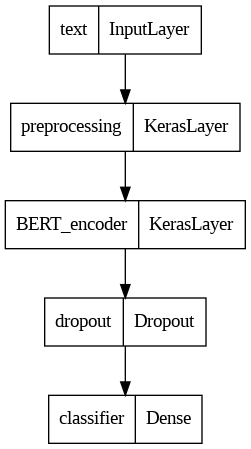

In [ ]:
tf.keras.utils.plot_model(classifier_model)

LOSS Function used

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [ ]:
xtrain=pd.DataFrame()

In [ ]:
epochs = 5
steps_per_epoch = len(x_val_train)
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

print(steps_per_epoch)

6400


In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

# classifier_model.compile(optimizer='adamw', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
x_val_train.shape

(6400, 1)

In [ ]:
# y_val_train=y_val_train.to_numpy() done already


In [ ]:
# y_val_test=y_val_test.to_numpy() done already

In [ ]:
pd.DataFrame(x_val_train)

,0
59,k gratch good girl since you asked for an answ...
1147,i have never written reviews but this book des...
5202,suzanne lummis take the femme fatale sterotype...
1601,leo colston is an exceptionally naive year old...
1343,i found this book to be most helpful the girl...
...,...
1786,this is a book for all of us women who love to...
882,i thought i wont like this book because i usua...
5591,this is a clearly written and well organized b...
2719,i havent seen anyone else put together a book ...


In [ ]:
# x_val_train = x_val_train.astype('float32')
y_val_train = y_val_train.astype('float32')
# x_val_test = x_val_test.astype('float32')
y_val_test = y_val_test.astype('float32')


In [ ]:
history = classifier_model.fit(x=x_val_train,
                               y=y_val_train,
                               validation_data=(x_val_test, y_val_test),
                               epochs=epochs)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


200/200 [==============================] - ETA: 0s - loss: 0.7049 - binary_accuracy: 0.5481

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


200/200 [==============================] - 61s 275ms/step - loss: 0.7049 - binary_accuracy: 0.5481 - val_loss: 0.6716 - val_binary_accuracy: 0.5881
Epoch 2/5
200/200 [==============================] - 50s 250ms/step - loss: 0.6425 - binary_accuracy: 0.6180 - val_loss: 0.5406 - val_binary_accuracy: 0.6837
Epoch 3/5
200/200 [==============================] - 56s 282ms/step - loss: 0.5351 - binary_accuracy: 0.6944 - val_loss: 0.5062 - val_binary_accuracy: 0.6963
Epoch 4/5
200/200 [==============================] - 56s 279ms/step - loss: 0.4992 - binary_accuracy: 0.7130 - val_loss: 0.4948 - val_binary_accuracy: 0.7144
Epoch 5/5
200/200 [==============================] - 56s 279ms/step - loss: 0.4725 - binary_accuracy: 0.7362 - val_loss: 0.4852 - val_binary_accuracy: 0.7200


In [ ]:
loss, accuracy = classifier_model.evaluate(x_test,y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


63/63 [==============================] - 7s 104ms/step - loss: 0.4757 - binary_accuracy: 0.7290
Loss: 0.47572940587997437
Accuracy: 0.7289999723434448


In [ ]:
y_pred=classifier_model.predict(x_test)

63/63 [==============================] - 7s 98ms/step


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
threshold = 0.5  # Adjust threshold as needed
y_pred_binary = (y_pred >= threshold).astype(int)

# Calculate the classification report
report = classification_report(y_test, y_pred_binary, target_names=['Class 0', 'Class 1'])

print(report)


              precision    recall  f1-score   support

     Class 0       0.71      0.76      0.74       994
     Class 1       0.75      0.69      0.72      1006

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000




WHY ACCURACY THIS LESS??



In [ ]:
x_test


,0
2989,in when steve had rock bands at dickens my ba...
7943,a good piece of advice is quotnever judge a bo...
2613,just wanted to add my voice to those of the ma...
4178,book was in great condition and the service wa...
6809,i write this in response to reviewer quotsteve...
...,...
149,i am responding for a vietnam combat veteran w...
5269,this is a great book i love the elizabeth seri...
3741,i read this and the other se hinton staple boo...
7870,my friend gwen once told me quotquirks are the...


In [ ]:
y_test

,0
2989,0
7943,1
2613,0
4178,0
6809,1
...,...
149,0
5269,1
3741,0
7870,1


In [ ]:

trial='i would not recommend this for the layman the author is telling too many of her own stories'

In [ ]:
data = {'Review': ['excellent','this book relseaed by farms in the early s is one of the books i would suggest to anyone lds or nolds to better understand the text from a variety of perspectivesbr br first of all the exegetical with such essays focusing on the meaning and background to pericope within the book of mormon text such as the nephite sacramental prayers in moroni and their historical development within nephite culture as seen in mosiah and nephi br br moreover there is the scholary and apologetic with the discussion of the disscovery of the place nahom in nephi and many other issues some which refute critical claims against the book of mormon volume','byzantine literature has been unfairly maligned in the west as uncreative and basically unreadable anna comnenas gripping masterpiece reveals just how wrong this judgment is if you are as impressed as i was you might go on to read michael psellos also in penguin procopius saint basil and the other cappadocian fathers the epic digenes akrites byzantiums answer to beowulf and roland barlaan and josaphat a novel presenting the life of the buddha in christianized form the lyric poetry of paul the silentiary and the host of other fine works produced over the years of this amazing civilization']}
df = pd.DataFrame(data)


In [ ]:
pred=classifier_model.predict(df)

1/1 [==============================] - 0s 26ms/step


In [ ]:
pred

array([[0.19026402],
       [0.01218782],
       [0.76893294]], dtype=float32)

In [ ]:
data = {'Review': ['i would not recommend this for the layman the author is telling too many of her own stories']}
df = pd.DataFrame(data)
